# Practical Python Programming for Biologists
Author: Dr. Daniel Pass | www.CompassBioinformatics.com

---

# The Big If!

Lets take a break from loops for a moment to talk about conditionals. These are basically "**if** this **then** that" statements. They are also super powerful and allow us lots of control over our data and code.

When working with numerical data it follows normal mathematical symbols:
```
if x > y:    print("x is greater than y")
if x < y:    print("x is less than y")
if x == y:   print("x is equal to y")
if x != y:   print("x is NOT equal to y")
if x >= y:   print("x is greater than or equal to y")
if x <= y:   print("x is less than or equal to y")
```

Note the ```==``` for equals. A common mistake is to use just one ```=``` character but as we know that assigns a variable value instead.

**Exercise:** Test which if statements print when you change the values

In [1]:
x = 5
y = 10

if x > y:    print("x is greater than y")
if x < y:    print("x is less than y")
if x == y:   print("x is equal to y")
if x != y:   print("x is NOT equal to y")
if x >= y:   print("x is greater than or equal to y")
if x <= y:   print("x is less than or equal to y")

x is less than y
x is NOT equal to y
x is less than or equal to y


False

Note: What we are really saying is  ```if x > y == True``` then do something, but we don't need to write the second part

## Exercise - While and If

Here we have a fastq style of DNA sequence - The bases themselves, and the quality of each base.

1. Create a while loop to print both the base and the quality at each position
2. Add an if statement to print only the bases where the quality is greater than 20 (What issue would happen with real data?)
- Extension: plot a quick graph of the quality scores!

T 31
G 29
C 27
A 35
T 31
G 29
A 34
C 39
T 40
G 30
C 35
A 38
T 30
C 28
G 29
A 30
T 33
C 26
G 24
T 29


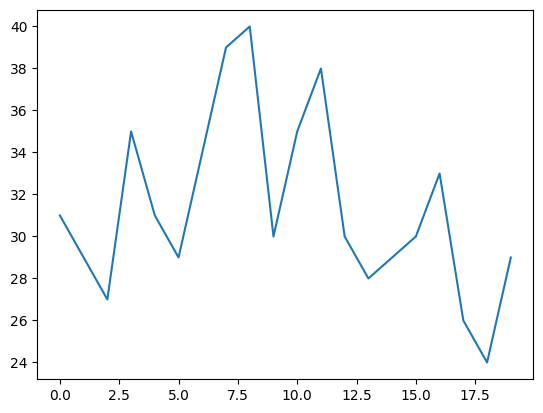

In [35]:
sequence = "TGCATGACTGCATCGATCGTACGATCGATCGATCGAT"
quality = [31, 29, 27, 35, 31, 29, 34, 39, 40, 30, 35, 38, 30, 28, 29, 30, 33, 26, 24, 29, 19, 11, 17, 16, 18, 17, 13, 11, 16, 19, 15, 3, 7, 15, 4, 10, 17]
treshold = 20

quality_20 = []

index = 0

while index < len(sequence):
  if quality[index] > treshold:
    quality_20.append(quality[index])
    print(sequence[index], quality_20[index])

  index += 1


import matplotlib.pyplot as plt

plt.plot(range(len(quality_20)), quality_20)

---
A more real example. Lets check if a single value is less than the a 0.05 significance threshold. Here we have a 2D list which is more complex, but we can access the elements of each list easily with double square brackets ```[ ][ ]```

In [ ]:
gene_data = [["TP53", 0.0001],["BRCA1", 0.002],["EGFR", 0.15],["KRAS", 0.00001],["MYC", 0.05]]

# If the value of the first list index (second element) is <0.05, then print the gene ID
if gene_data[0][1] < 0.05:
  print(gene_data[0][0], "has p<0.05")


Now lets put that in a loop for all our genes
(How could you re-write this code to use fewer lines?)

In [ ]:
for gene in gene_data:
  geneID = gene[0]
  geneValue = gene[1]

  if geneValue < 0.05:
    print(geneID, "has p<0.05")


We can also use an if statement to search within a string. This is a very python-style type of writing as it is very simple and clear, where other languages may require more complexity for comparisons.

Note that although it works nicely, there are more efficient ways to do this with larger datasets.

In [ ]:
# Check if a DNA sequence contains a specific motif
sequence = "ATGCTGACTGACGTGAGCTAGCTAGCTAGCTAGCTG"
motif = "GCTAG"

if motif in sequence:
    print("Motif found in the sequence")


species = ['Arabidopsis', 'Bos taurus', 'C. elegans', 'Drosophila', 'E. coli']

if "Arabaaadopsis" in species:
    print("found it!")


## if/else/elif

Ifs are good, but what about if not? We can do that using ```else```

In [ ]:
# Check if a DNA sequence length is divisible by 3
sequence = "ATGCTGACTGACGTGAGCTAGCTAGCTAGCTAGCTG"

if len(sequence) % 3 == 0:
    print("The Open Reading Frame has complete codon usage")
else:
    print("The Open Reading Frame does not have complete codons")


We can then make it more complicated with elif (short for else-if).

In [ ]:
dna_motifs = ["ATCG", "GCTAGA", "ACGAAAT", "TAGAC", "CGAT", "CTGATGGA", "GTTCACTACGGAC", "TGCGTTA", "AGTC", "CGGGAGT", "TATGCG", "GCATTG", "ACCACACACACACACCCC"]

for motif in dna_motifs:
  if len(motif) <= 4:
      print("Short:\t", motif)
  elif len(motif) <= 6:
      print("Medium:\t", motif)
  elif len(motif) <= 8:
      print("Long:\t", motif)
  else:
      print("Woah that's big!", motif)


We can access a dictionary in the same way. An ```if``` statement is a useful way to test if the key you are looking for exists. We have a dictionary of SampleIDs and their geographic locations.

Often python is really helpful in it's simplicity because here it knows that asking "if X in dictionary" to check if it is in the keys and if true will come back and continue the statement (in a way that the .get() function doesn't).

In [ ]:
sample_locations = {
    'DAP01': (40.7128, -74.0060),
    'DAP02': (51.5074, -0.1278),
    'DAP03': (48.8566, 2.3522),
    'DAP05': (34.0522, -118.2437),
    'DAP06': (35.6895, 139.6917)
}

sample_to_test = "DAP04"

if sample_to_test in sample_locations:
    print(sample_locations[sample_to_test])
else:
    print("That sample is missing")

## AND/OR/NOT

Just as we get our brains around ```ifs``` and ```elses```, we can also combine multiple together. This is useful for situations such as:

- If gene binding site contains TATTA and is <100bp from TSS....
- If sample count is >100 or in PIs favourite species list
- If antibiotic resistance is present but not in my list of already tested....

They're good examples, lets see what the code would look like:

In [ ]:
# Sample TFBS sequences and their distances from TSS
# Note the use of a tuple here for simplicity in the example.
gene_binding_sites = [
    ("TFBS1", "CGTATTATCG", 80),
    ("TFBS2", "ACGTATCGTATTA", 120),
    ("TFBS3", "CTAGGTTA", 90),
    ("TFBS4", "TATTACGTA", 40),
    ("TFBS5", "ATGCTTACG", 110)
]

# Loop over gene binding sites and check conditions
for binding_site in gene_binding_sites:
    # Using the special tuple assigning method
    gene, sequence, distance = binding_site

    if "TATTA" in sequence and distance < 100:
        print("Gene", gene, "matches the conditions")

## Exercise - print only the genes which start with an A or C (there's a method named .startswith()) but are over 100 distance

In [ ]:
# Sample data: animal names and their corresponding read counts
animal_samples = [
    ("Lion", 7500),
    ("Elephant", 2100),
    ("Giraffe", 1250),
    ("Tiger", 950),
    ("Zebra", 1800)
]

# List of PI's favorite species
favorite_species = ["Lion", "Giraffe", "Cheetah"]

# Iterate over animal samples and check conditions
for animal, count in animal_samples:
    if count > 2000 or animal in favorite_species:
        print("Sample", animal, "matches the conditions")

In [ ]:
# antibiotics and resistance gene found
antibiotics = [
    ("Amoxicillin", True),
    ("Ciprofloxacin", False),
    ("Gentamicin", True),
    ("Tetracycline", False),
    ("Vancomycin", True)
]

already_tested = ["Amoxicillin", "Ciprofloxacin"]

# Test if antibiotic is in the already_tested list
print("Already testsed:")
for antibiotic_pair in antibiotics:
  if antibiotic_pair[0] not in already_tested:
    print(antibiotic_pair[0])

print()
# Test if resistance presence is known, AND NOT in already tested
# Note the tuple assignment again
for antibiotic, resistance in antibiotics:
    if resistance and antibiotic not in already_tested:
        print("Antibiotic", antibiotic, "matches the conditions")

## Exercises - ifs, buts, and maybes

Lets practice. Make each statement indepentantly (they don't all connect together)

1.   Print the genes with expression greater than 2
2.   Print the genes with expression greater than 2 but less than 3
3.   Print the genes with expression less than 1 or greater than 3, and print any other genes with the label "medium"
4.   Print the genes with expression less than 2 but not called "BRCA1"
5.   Print "Low", "Medium" or "High" based on if the value is <2, 2-3, or >3


In [ ]:
gene_expression = [("TP53", 2.5), ("BRCA1", 1.8), ("EGFR", 3.2), ("KRAS", 0.9), ("MYC", 2.7), ("PTEN", 1.2), ("CDKN2A", 4.5), ("AKT1", 2.0), ("ERBB2", 1.5), ("RB1", 3.8)]

for gene, expression in gene_expression:
    ...

KRAS
PTEN
ERBB2


---
## Advanced looping

### Loop control
If we start running through a loop, it will continue to the end. If our objective is "Do X for every item in list" then that is good however, sometimes we don't want that to happen and once we have reached the data we want then we can stop, or skip that turn

- ```continue``` - Move on to the next element in the loop immediately - don't do any more code on this itteration
- ```break``` - Stop the loop right now, do no more processing

In [ ]:
gene_list = ["RB1", "PIK3CA", "BRAF", "HOX2", "JAK2", "HOX5", "NOTCH1", "FLT3", "KRAS", "EGFR", "PTEN", "HOX1", "BRAF", "PIK3CA", "HOX9", "JAK2"]

print("Skipping HOX genes:")
for gene in gene_list:
    if "HOX" in gene:
        # Don't do anything, just move on to next element
        continue
    print(gene)

# Note here it stops before printing anything else on that loop
print("\nStopping if I find HOX5:")
for gene in gene_list:
    if "HOX5" in gene:
        # Stop the loop!
        break
    print(gene)


Skipping HOX genes:
RB1
PIK3CA
BRAF
JAK2
NOTCH1
FLT3
KRAS
EGFR
PTEN
BRAF
PIK3CA
JAK2

Stopping if I find HOX5:
RB1
PIK3CA
BRAF
HOX2
JAK2


## Exercise - Loop control

When we did our quality filtering earlier, the data was designed to not raise above 20 after going below. But that's not realistic! Here is some more variable data.

- Use your code from earlier (The While section) and include a ```break``` condition to stop looping when it first goes below 20

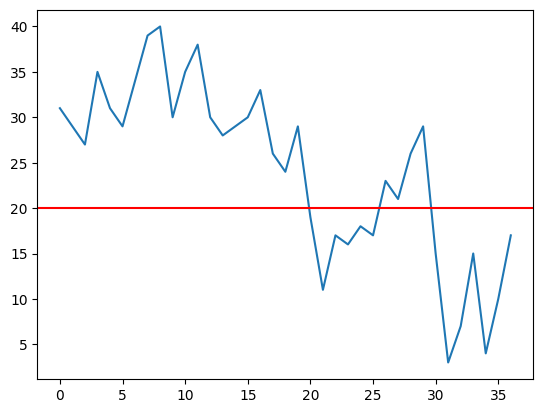

In [ ]:
sequence = "TGCATGACTGCATCGATCGTACGATCGATCGATCGAT"
quality = [31, 29, 27, 35, 31, 29, 34, 39, 40, 30, 35, 38, 30, 28, 29, 30, 33, 26, 24, 29, 19, 11, 17, 16, 18, 17, 23, 21, 26, 29, 15, 3, 7, 15, 4, 10, 17]

import matplotlib.pyplot as plt

plt.plot(range(len(quality)), quality)
plt.axhline(20, color = "red")
plt.show()

In [ ]:
# Your code


Full: TGCATGACTGCATCGATCGTACGATCGATCGATCGAT
Trim: TGCATGACTGCATCGATCGT


# Exercise - Loops, lists, and ifs
**Objective**: Take our list of genes and output the most up/down regulated genes with key information

This exercise is the most dificult we've done and will need you to use lists, loops, ifs, and dictionaries! It is not supposed to be simple and probably will take 10-20 minutes.

Suggested steps:

1.   Make empty lists for your up/down gene lists
2.   Make a loop to run through the list of gene expression values and use if/else to build your lists
3.   Itterate through your new lists and use the dictionary to report if they have been qPCR tested
4.   Output in a clean text format such as:

"Here we tested X genes resulting in Y upregulated and Z downregulated. qPCR confirmed A and B respectively. Here is the full list:"


**Extension:** Filter the data to greater than +/- 2 expression. What % of genes are removed by this filter?


In [ ]:
# Data for your analysis
gene_list = ["TP53", "BRCA1", "EGFR", "KRAS", "MYC", "PTEN", "CDKN2A", "AKT1", "ERBB2", "RB1", "PIK3CA", "BRAF", "MET", "JAK2", "MAPK1", "NOTCH1", "FLT3", "KRAS", "EGFR", "PTEN", "TP53", "BRAF", "PIK3CA", "MYC", "ERBB2", "RB1", "AKT1", "CDKN2A", "MAPK1", "JAK2"]
gene_exp = [['TP53', -1.4245], ['BRCA1', 4.0941], ['EGFR', 1.8266], ['KRAS', -0.8996], ['MYC', -2.1188], ['PTEN', -1.8499], ['CDKN2A', 4.2798], ['AKT1', 0.4709], ['ERBB2', 2.144], ['RB1', 4.7541], ['PIK3CA', 2.6291], ['BRAF', 2.1514], ['MET', 0.2558], ['JAK2', 5.0332], ['MAPK1', 5.295], ['NOTCH1', 2.5695], ['FLT3', 5.3211], ['KRAS', 3.064], ['EGFR', 0.1768], ['PTEN', -0.4923], ['TP53', -4.7796], ['BRAF', -3.8257], ['PIK3CA', 0.3357], ['MYC', -0.0917], ['ERBB2', -3.2586], ['RB1', -0.7903], ['AKT1', 0.6729], ['CDKN2A', 5.8131], ['MAPK1', -4.9549], ['JAK2', -0.936]]
qPCR_status = {'TP53': False, 'BRCA1': False, 'EGFR': True, 'KRAS': False, 'MYC': True, 'PTEN': True, 'CDKN2A': False, 'AKT1': True, 'ERBB2': False, 'RB1': False, 'PIK3CA': True, 'BRAF': False, 'MET': False, 'JAK2': True, 'MAPK1': False, 'NOTCH1': False, 'FLT3': True}


In [ ]:
# Your code here


Here we tested 30 genes resulting in 18 upregulated and 12 downregulated. qPCR confirmed 8 and 5 respectively.
Here is the full list:

qPCR confirmed upregulated genes
EGFR
AKT1
PIK3CA
JAK2
FLT3
EGFR
PIK3CA
AKT1

qPCR confirmed downregulated genes
MYC
PTEN
PTEN
MYC
JAK2
